# Exercise 2: Bias-variance trade-off and resampling techniques (score 15 points)

Our aim here is to study the bias-variance trade-off by implementing the **bootstrap** resampling technique.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your test data, make
first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and
Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to 
indicate possible regions of low/high bias and variance. You will most likely not get an
equally smooth curve!

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

Let us assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the means
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2.
$$

Explain what the terms mean, which one is the bias and which one is
the variance and discuss their interpretations.

Perform then a bias-variance analysis of the Franke function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.

Note also that when you calculate the bias, in all applications you don't know the function values $f_i$. You would hence replace them with the actual data points $y_i$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def FrankeFunctionWithNoise(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = np.random.normal(0, 0.1, len(x)*len(x))
    noise = noise.reshape(len(x),len(x))
    return term1 + term2 + term3 + term4 + noise


def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)


Polynomial degree: 1
Error: 0.03356847208789797
Bias^2: 0.03355554269576443
Var: 1.2929392133541453e-05
0.03356847208789797 >= 0.03355554269576443 + 1.2929392133541453e-05 = 0.033568472087897976



Polynomial degree: 2
Error: 0.02764490158816487
Bias^2: 0.02762696506454752
Var: 1.793652361734788e-05
0.02764490158816487 >= 0.02762696506454752 + 1.793652361734788e-05 = 0.027644901588164867



Polynomial degree: 3
Error: 0.017856546304476226
Bias^2: 0.017838941448191918
Var: 1.7604856284312742e-05
0.017856546304476226 >= 0.017838941448191918 + 1.7604856284312742e-05 = 0.01785654630447623



Polynomial degree: 4
Error: 0.014077298583987432
Bias^2: 0.014050189041390836
Var: 2.710954259659386e-05
0.014077298583987432 >= 0.014050189041390836 + 2.710954259659386e-05 = 0.01407729858398743



Polynomial degree: 5
Error: 0.012286953010194637
Bias^2: 0.01225576443239452
Var: 3.1188577800117966e-05
0.012286953010194637 >= 0.01225576443239452 + 3.1188577800117966e-05 = 0.012286953010194638



Polyno

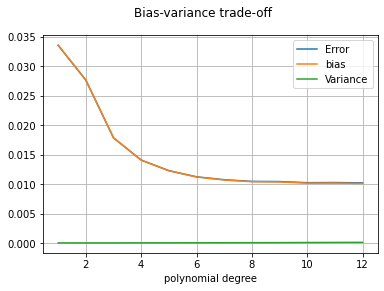

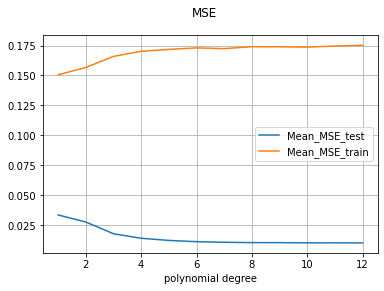

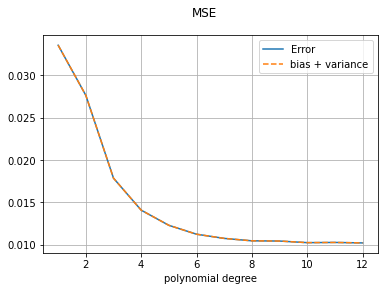

In [4]:
################# Parameters #################

n = 100  #number of data
n_bootstraps = 20 #number of boostraps
polynomial = 12 #polynomial degree

#############################################


#Set up the data
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = FrankeFunctionWithNoise(x, y)

x_y = np.empty((len(x)*len(x), 2))
x_y[:, 0] = x.ravel()
x_y[:, 1] = y.ravel()

#Scale the data
scaler = StandardScaler()
scaler.fit(x_y)
x_y = scaler.transform(x_y)
x_y_train, x_y_test, z_train, z_test = train_test_split(x_y, z.ravel(), test_size=0.2)


error = np.zeros(polynomial)
bias = np.zeros(polynomial)
variance = np.zeros(polynomial)
MSE = np.zeros(polynomial)

list_degree = range(1, polynomial+1)

train_error = np.zeros(polynomial)


#for each polynomial degree
for degree in list_degree:
    
    #set up our predictions
    pred_test = np.empty((z_test.shape[0], n_bootstraps))
    pred_train = np.empty((z_train.shape[0], n_bootstraps))

    #for each boostrops we are computing the design matrix and beta in order to get our predictions
    for i in range(n_bootstraps):

        x_y_, z_ = resample(x_y_train, z_train)
        X_train = create_X(x_y_[:, 0], x_y_[:, 1], degree)
        X_test = create_X(x_y_test[:, 0], x_y_test[:, 1], degree)
        beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_)
        pred_test[:, i] = X_test @ beta
        pred_train[:, i] = X_train @ beta
    
    #Compute the mean of the MSE, bias and variance
    indice = degree-1
    error[indice] = np.mean( np.mean((z_test.reshape(z_test.shape[0], 1) - pred_test)**2, axis=1, keepdims=True) )
    bias[indice] = np.mean((z_test.reshape(z_test.shape[0], 1) - np.mean(pred_test, axis=1, keepdims=True)) ** 2)
    variance[indice] = np.mean(np.var(pred_test, axis=1, keepdims=True))
    MSE[indice] = np.mean( np.mean((z_train.reshape(z_train.shape[0], 1) - pred_train)**2, axis=1, keepdims=True) )

    print('Polynomial degree:', degree)
    print('Error:', error[indice])
    print('Bias^2:', bias[indice])
    print('Var:', variance[indice])
    print('{} >= {} + {} = {}'.format(error[indice], bias[indice], variance[indice], bias[indice]+variance[indice]))
    print("\n\n")



#plot the bias-variance trade-off
plt.figure("Bias-variance trade-off ")
plt.suptitle("Bias-variance trade-off ")
plt.plot(list_degree, error, label='Error')
plt.plot(list_degree, bias, label='bias')
plt.plot(list_degree, variance, label='Variance')
plt.xlabel("polynomial degree")
plt.legend()
plt.grid()

#plot the MSE train and test
plt.figure("MSE")
plt.suptitle("MSE")
plt.plot(list_degree, error, label='Mean_MSE_test')
plt.plot(list_degree, MSE, label='Mean_MSE_train')
plt.xlabel("polynomial degree")
plt.legend()
plt.grid()

#plot the bias-variance trade-off
plt.figure("Bias + variance")
plt.suptitle("MSE")
plt.plot(list_degree, error, label='Error')
plt.plot(list_degree, bias + variance, '--', label='bias + variance')
plt.xlabel("polynomial degree")
plt.legend()
plt.grid()

plt.show()